<a href="https://colab.research.google.com/github/NoobCoder-dweeb/AI-HandsOn-Journey/blob/main/notes/PytorchLightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import lightning as L
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


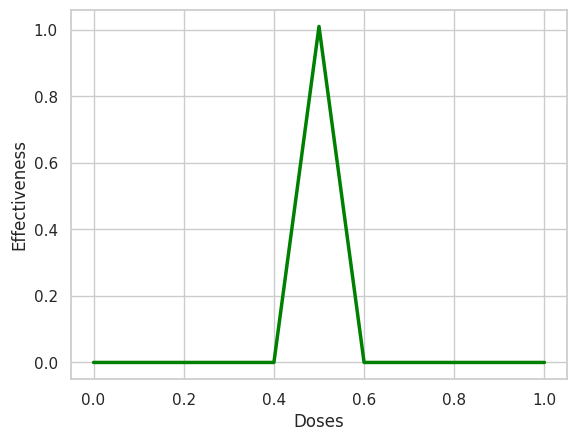

In [ ]:
class BasicLightning(L.LightningModule):
  def __init__(self):
    super(BasicLightning, self).__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=False)


  def forward(self, input):
    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output * self.w01

    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output * self.w11

    input_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)

    output = F.relu(input_final_relu)

    return output


# test
input_doses = torch.linspace(start=0, end=1, steps=11)
print(input_doses)

model = BasicLightning()
output_vales = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(
    x=input_doses,
    y=output_vales,
    color="green",
    linewidth=2.5
)

plt.ylabel("Effectiveness")
plt.xlabel("Doses")
plt.show()

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


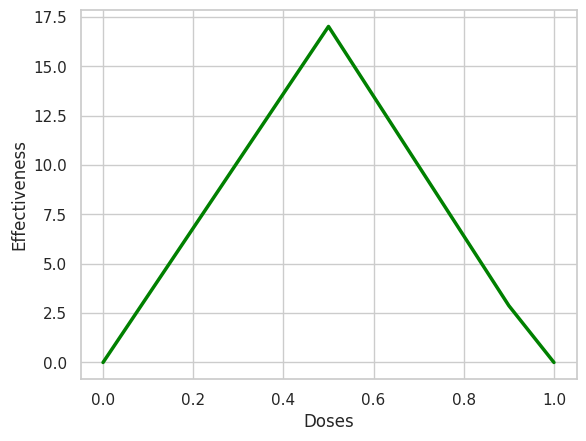

In [ ]:
class BasicLightningTrain(L.LightningModule):
  def __init__(self):
    super(BasicLightningTrain, self).__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)
    self.learning_rate = 0.001


  def forward(self, input):
    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output * self.w01

    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output * self.w11

    input_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)

    output = F.relu(input_final_relu)

    return output

  def configure_optimizers(self):
    return SGD(self.parameters(), lr=self.learning_rate)

  def training_step(self, batch, batch_idx):
    input_i, label_i = batch
    output_i = self.forward(input_i)
    loss = (output_i - label_i)**2

    return loss

# test
input_doses = torch.linspace(start=0, end=1, steps=11)
print(input_doses)

model = BasicLightningTrain()
output_vales = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(
    x=input_doses,
    y=output_vales.detach(),
    color="green",
    linewidth=2.5
)

plt.ylabel("Effectiveness")
plt.xlabel("Doses")
plt.show()

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_st

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.002137962089502232
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.002137962089502232
INFO: Restoring states from the checkpoint path at /content/.lr_find_e604ae18-9bc8-492d-9bdf-44f658b2511f.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_e604ae18-9bc8-492d-9bdf-44f658b2511f.ckpt
INFO: Restored all states from the checkpoint at /content/.lr_find_e604ae18-9bc8-492d-9bdf-44f658b2511f.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_e604ae18-9bc8-492d-9bdf-44f658b2511f.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name         | Type | Params | Mode
----------------------------------

lr_find() suggests 0.002138


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1000` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


tensor(-15.7895)


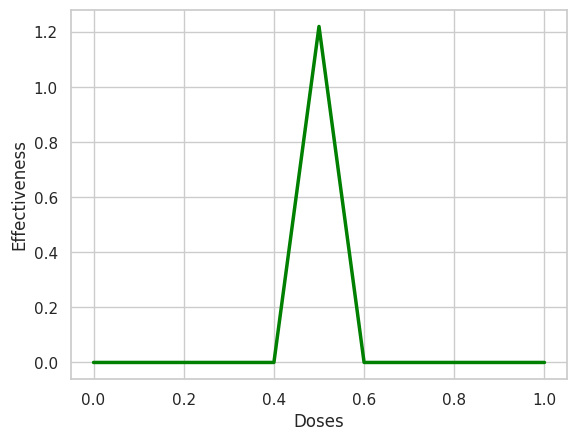

In [ ]:
# create training data
inputs = torch.tensor([0.0, .5, 1.])
labels = torch.tensor([0., 1., 0.])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

model = BasicLightningTrain()
trainer = L.Trainer(max_epochs=1000, accelerator="auto", devices="auto")

lr_find_results = L.pytorch.tuner.Tuner(trainer).lr_find(model,
                                        train_dataloaders=dataloader,
                                        min_lr=0.001,
                                        max_lr=1.0,
                                        early_stop_threshold=None)

new_lr = lr_find_results.suggestion()

print(f"lr_find() suggests {new_lr:.5}")

model.learning_rate = new_lr

trainer.fit(model, train_dataloaders=dataloader)

print(model.final_bias.data)

output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(
    x=input_doses,
    y=output_values.detach(),
    color="green",
    linewidth=2.5
)

plt.ylabel("Effectiveness")
plt.xlabel("Doses")
plt.show()